## Bike Sharing Assignment 


Loading required libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [2]:
#Loading dataset 
sharing_df=pd.read_csv("day.csv")

## Step 1. Understanding Dataset

In [3]:
sharing_df.shape

(730, 16)

In [4]:
sharing_df.sample(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
629      630  22-09-2019       3   1     9        0        6           0   
537      538  22-06-2019       3   1     6        0        5           1   
50        51  20-02-2018       1   0     2        0        0           0   
407      408  12-02-2019       1   1     2        0        0           0   
706      707  08-12-2019       4   1    12        0        6           0   
609      610  02-09-2019       3   1     9        0        0           0   
664      665  27-10-2019       4   1    10        0        6           0   
502      503  18-05-2019       2   1     5        0        5           1   
336      337  03-12-2018       4   0    12        0        6           0   
644      645  07-10-2019       4   1    10        0        0           0   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
629           1  26.650000  30.52440  64.6667  19.000061    2512        5883   
537           1  31.877500  36.20605  57.3750  12.250414     964        4859   
50            1  11.693897  13.86650  40.7826  14.956745     639        1173   
407           1   5.227500   5.08290  46.4583  27.417204      73        1456   
706           2  15.648347  19.47540  91.1250   6.792393    1153        4429   
609           2  28.563347  32.45000  81.5000   4.292744    2613        3197   
664           2  21.730000  25.75665  72.0000  15.791364    2643        5209   
502           1  23.130847  27.55605  52.3333   9.166739    1521        6118   
336           1  12.265847  15.53020  61.2917   6.417481     706        2908   
644           2  17.049153  20.99065  70.8333   9.457854     781        2729   

      cnt  
629  8395  
537  5823  
50   1812  
407  1529  
706  5582  
609  5810  
664  7852  
502  7639  
336  3614  
644  3510

### Observation 1- 

- instant is like index and can be deleted.
- we can extract day from dteday as month and yr are already extracted

In [5]:
sharing_df.describe(include='all')

instant      dteday      season          yr        mnth  \
count   730.000000         730  730.000000  730.000000  730.000000   
unique         NaN         730         NaN         NaN         NaN   
top            NaN  16-10-2019         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    365.500000         NaN    2.498630    0.500000    6.526027   
std     210.877136         NaN    1.110184    0.500343    3.450215   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.250000         NaN    2.000000    0.000000    4.000000   
50%     365.500000         NaN    3.000000    0.500000    7.000000   
75%     547.750000         NaN    3.000000    1.000000   10.000000   
max     730.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   730.000000  730.000000  730.000000  730.000000  730.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028767    2.997260    0.683562    1.394521   20.319259   
std       0.167266    2.006161    0.465405    0.544807    7.506729   
min       0.000000    0.000000    0.000000    1.000000    2.424346   
25%       0.000000    1.000000    0.000000    1.000000   13.811885   
50%       0.000000    3.000000    1.000000    1.000000   20.465826   
75%       0.000000    5.000000    1.000000    2.000000   26.880615   
max       1.000000    6.000000    1.000000    3.000000   35.328347   

             atemp         hum   windspeed       casual   registered  \
count   730.000000  730.000000  730.000000   730.000000   730.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean     23.726322   62.765175   12.763620   849.249315  3658.757534   
std       8.150308   14.237589    5.195841   686.479875  1559.758728   
min       3.953480    0.000000    1.500244     2.000000    20.000000   
25%      16.889713   52.000000    9.041650   316.250000  2502.250000   
50%      24.368225   62.625000   12.125325   717.000000  3664.500000   
75%      30.445775   72.989575   15.625589  1096.500000  4783.250000   
max      42.044800   97.250000   34.000021  3410.000000  6946.000000   

                cnt  
count    730.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4508.006849  
std     1936.011647  
min       22.000000  
25%     3169.750000  
50%     4548.500000  
75%     5966.000000  
max     8714.000000

In [6]:
sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Dropping instant as it is just index

sharing_df.drop(['instant'],axis=1,inplace=True)

## Visualizing data for better understanding of patterns


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 1440x1008 with 0 Axes>

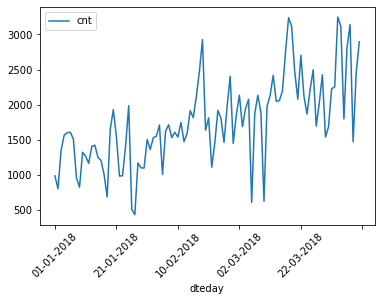

In [10]:
plt.figure(figsize=(20,14))
sharing_df[:100].plot(x='dteday',y='cnt')
plt.xticks(rotation=45)

In [11]:
# Extracting day out of given date
sharing_df['day']= sharing_df.dteday.apply(lambda x : x[:2])

#Dropping dteday as all date is already extracted

sharing_df.drop(['dteday'],axis=1,inplace=True)
sharing_df.head(5)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt day  
0  18.18125  80.5833  10.749882     331         654   985  01  
1  17.68695  69.6087  16.652113     131         670   801  02  
2   9.47025  43.7273  16.636703     120        1229  1349  03  
3  10.60610  59.0435  10.739832     108        1454  1562  04  
4  11.46350  43.6957  12.522300      82        1518  1600  05

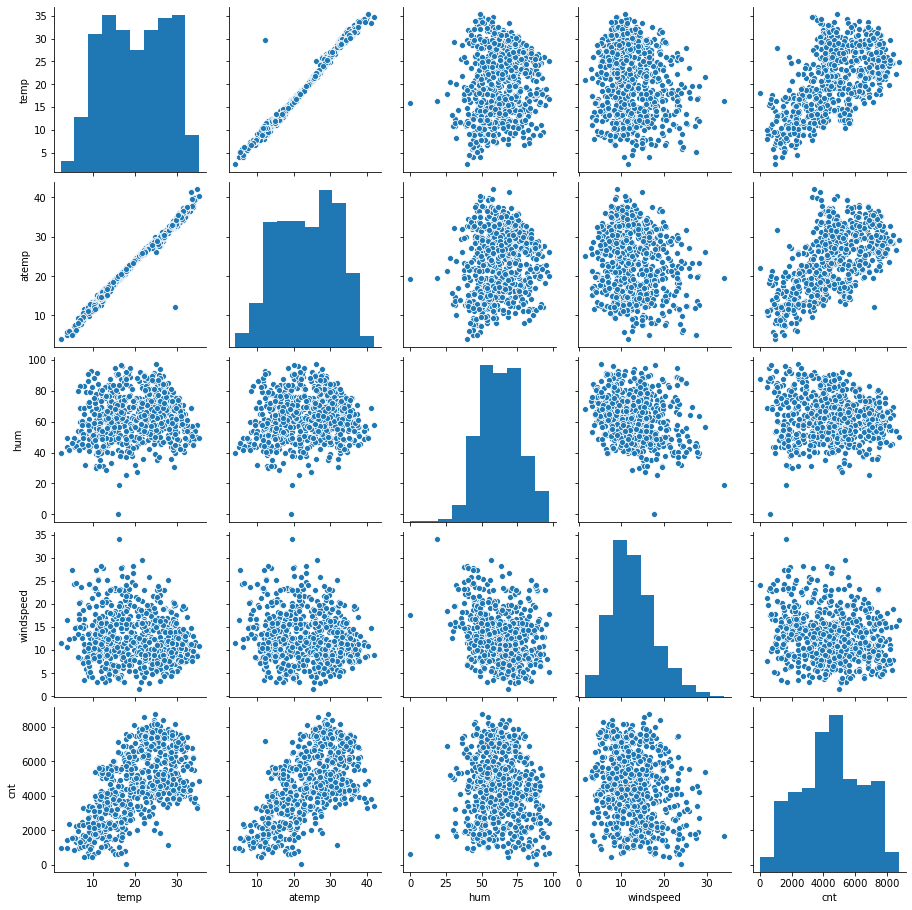

In [12]:
# Pairplot to check the variation with different variables

sns.pairplot(sharing_df[['temp','atemp','hum','windspeed','cnt']])

### We can see the dependecy of cnt on temp and other factors 

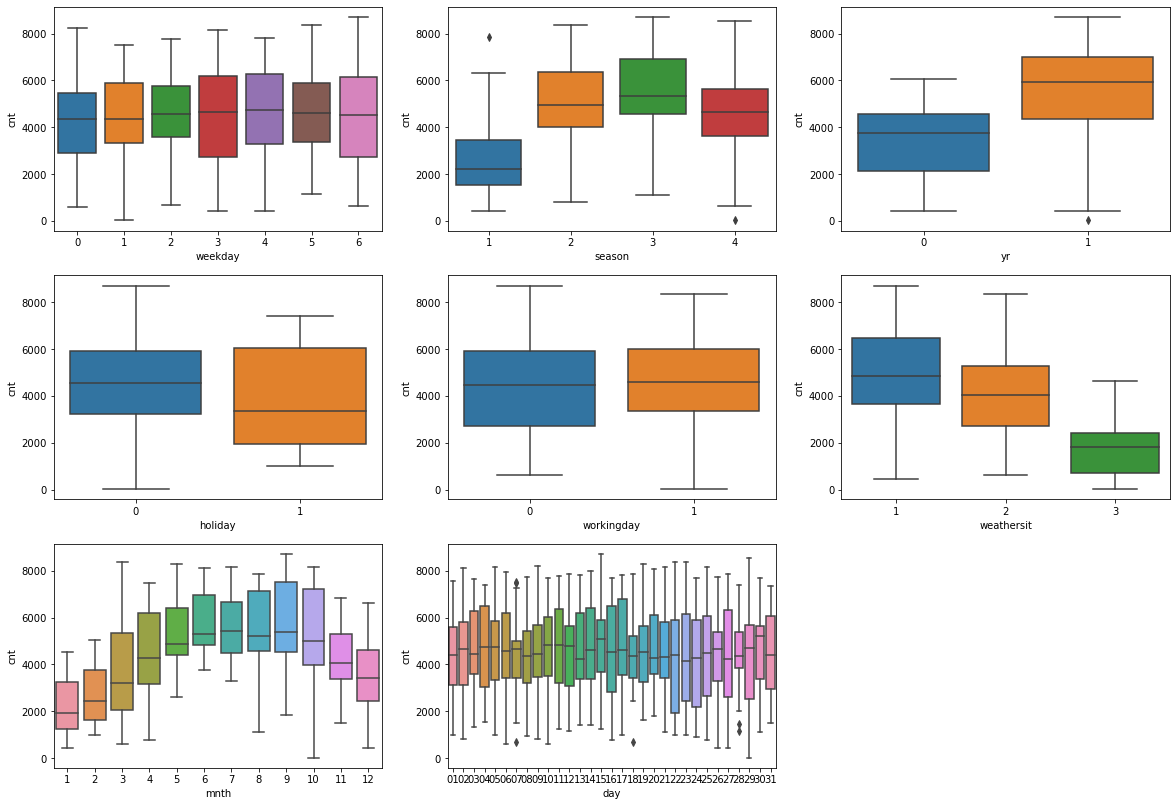

In [13]:
plt.figure(figsize=(20,14))
plt.subplot(3,3,1)
sns.boxplot(sharing_df.weekday,sharing_df.cnt)
plt.subplot(3,3,2)
sns.boxplot(sharing_df.season,sharing_df.cnt)
plt.subplot(3,3,3)
sns.boxplot(sharing_df.yr,sharing_df.cnt)
plt.subplot(3,3,4)
sns.boxplot(sharing_df.holiday,sharing_df.cnt)
plt.subplot(3,3,5)
sns.boxplot(sharing_df.workingday,sharing_df.cnt)
plt.subplot(3,3,6)
sns.boxplot(sharing_df.weathersit,sharing_df.cnt)
plt.subplot(3,3,7)
sns.boxplot(sharing_df.mnth,sharing_df.cnt)
plt.subplot(3,3,8)
sns.boxplot(sharing_df.day,sharing_df.cnt)

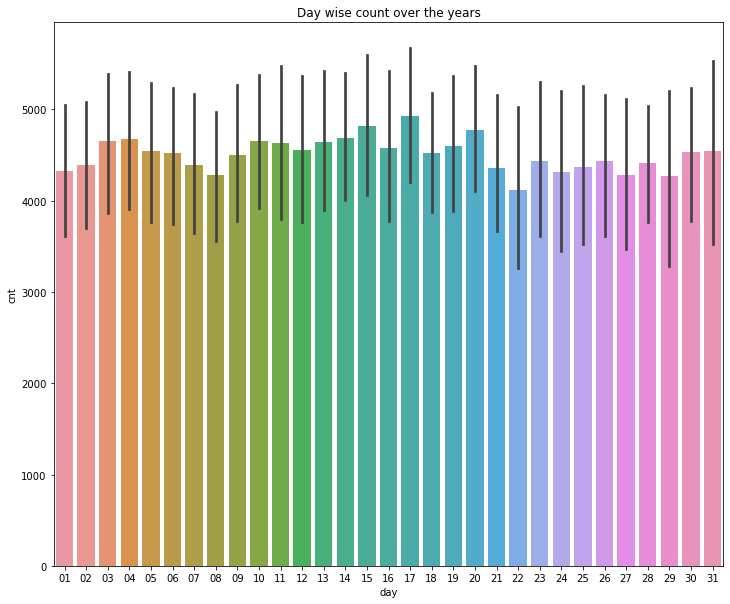

In [14]:
plt.figure(figsize=(12,10))
plt.title("Day wise count over the years")
sns.barplot(sharing_df.day,sharing_df.cnt)

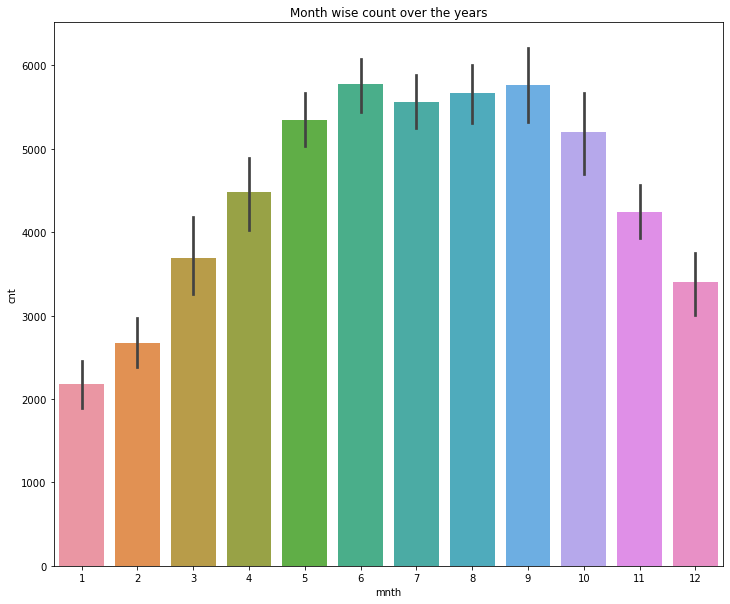

In [15]:
plt.figure(figsize=(12,10))
plt.title("Month wise count over the years")
sns.barplot(sharing_df.mnth,sharing_df.cnt)

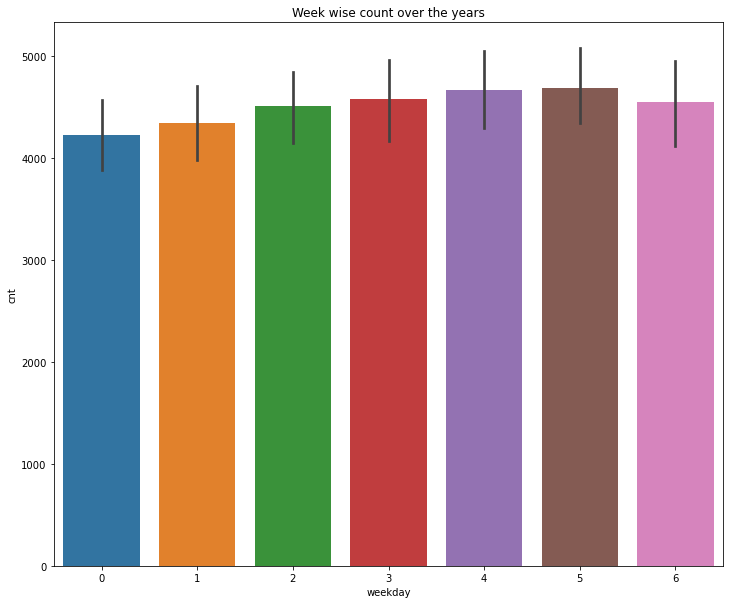

In [16]:
plt.figure(figsize=(12,10))
plt.title("Week wise count over the years")
sns.barplot(sharing_df.weekday,sharing_df.cnt)

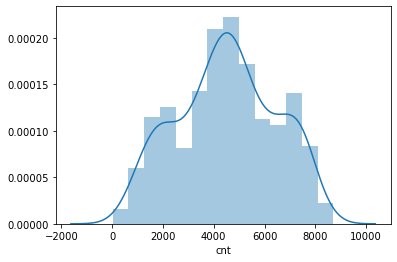

In [17]:
# Variation of cnt 

sns.distplot(sharing_df.cnt)

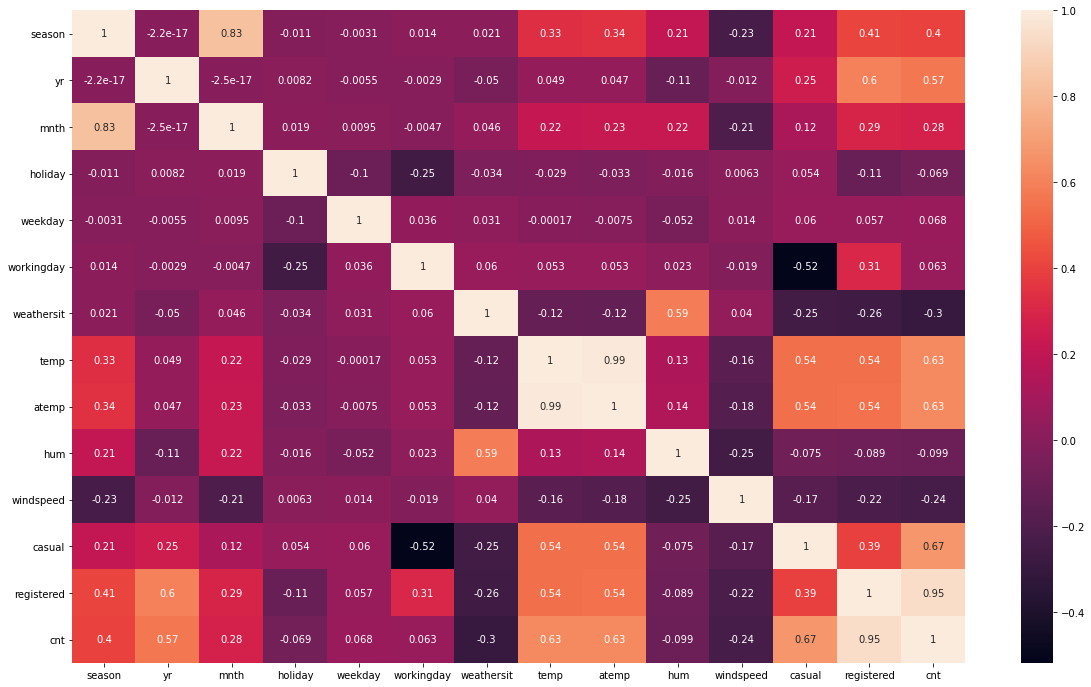

In [18]:
# Correlation between variables

plt.figure(figsize=(20,12))
sns.heatmap(sharing_df.corr(),annot=True)


## Observation 2- 

- We can remove the temp as it is similar to atemp
- Since, we are more focussed on cnt - We will remove registered and casual as well.

In [19]:
# Dropping Temp, casual, registered

sharing_df.drop(['temp','casual','registered'],axis=1,inplace=True)
sharing_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit     atemp  \
0       1   0     1        0        6           0           2  18.18125   
1       1   0     1        0        0           0           2  17.68695   
2       1   0     1        0        1           1           1   9.47025   
3       1   0     1        0        2           1           1  10.60610   
4       1   0     1        0        3           1           1  11.46350   

       hum  windspeed   cnt day  
0  80.5833  10.749882   985  01  
1  69.6087  16.652113   801  02  
2  43.7273  16.636703  1349  03  
3  59.0435  10.739832  1562  04  
4  43.6957  12.522300  1600  05

## Step 2 - Feature Engineering 

- Converting Dummy variables for required features
- We will convert `season`, `mnth`, `weekday`,`weathersit`,`day`

In [20]:
status = pd.get_dummies(sharing_df.season,prefix='season')
status.head()

season_1  season_2  season_3  season_4
0         1         0         0         0
1         1         0         0         0
2         1         0         0         0
3         1         0         0         0
4         1         0         0         0

### Since, we can always predict the season variable like this - 

- `000` - `season_1`
- `100` - `season_2`
- `110` - `season_3`
- `111` - `season_4`

Hence, we can drop one column and have only three variables.

In [21]:
status = pd.get_dummies(sharing_df.season,prefix='season',drop_first=True)
status.head()

season_2  season_3  season_4
0         0         0         0
1         0         0         0
2         0         0         0
3         0         0         0
4         0         0         0

In [22]:
# Concating season dummy variables to dataframe and droppting season variable

sharing_df= pd.concat([sharing_df,status],axis=1)

# Dropping season column

sharing_df.drop(['season'],axis=1,inplace=True)
sharing_df.head()

yr  mnth  holiday  weekday  workingday  weathersit     atemp      hum  \
0   0     1        0        6           0           2  18.18125  80.5833   
1   0     1        0        0           0           2  17.68695  69.6087   
2   0     1        0        1           1           1   9.47025  43.7273   
3   0     1        0        2           1           1  10.60610  59.0435   
4   0     1        0        3           1           1  11.46350  43.6957   

   windspeed   cnt day  season_2  season_3  season_4  
0  10.749882   985  01         0         0         0  
1  16.652113   801  02         0         0         0  
2  16.636703  1349  03         0         0         0  
3  10.739832  1562  04         0         0         0  
4  12.522300  1600  05         0         0         0

### Performing the same operation for mnth, weekday,weathersit,day

In [23]:
dummy_list=['mnth','weekday','weathersit','day']

for i in dummy_list:
    status = pd.get_dummies(sharing_df[i],prefix=i,drop_first=True)
    sharing_df= pd.concat([sharing_df,status],axis=1)
    sharing_df.drop([i],axis=1,inplace=True)

sharing_df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3', 'day_02',
       'day_03', 'day_04', 'day_05', 'day_06', 'day_07', 'day_08', 'day_09',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30',
       'day_31'],
      dtype='object')

In [24]:
sharing_df.shape

(730, 59)

In [25]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

sharing_df.sample(10)

yr  holiday  workingday     atemp      hum  windspeed   cnt  season_2  \
555   1        0           1  33.23980  66.7500  10.166379  6290         0   
501   1        0           1  28.63065  52.0000  15.374825  7384         1   
685   1        0           0  16.31915  54.5417  12.041843  5629         0   
217   0        0           0  33.80770  75.5000  15.292750  4294         0   
260   0        0           0  24.52685  69.5000  11.958361  4274         0   
544   1        0           1  39.33065  48.8750  11.082939  5463         0   
119   0        0           0  23.20105  50.3333  15.750025  5312         1   
216   0        0           1  32.82835  63.0833  12.374632  4866         0   
116   0        0           1  28.75710  83.5417  20.917400  3872         1   
619   1        0           1  28.50375  57.7083   8.833682  7870         0   

     season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  \
555         1         0       0       0       0       0       0       1   
501         0         0       0       0       0       1       0       0   
685         0         1       0       0       0       0       0       0   
217         1         0       0       0       0       0       0       0   
260         1         0       0       0       0       0       0       0   
544         1         0       0       0       0       0       1       0   
119         0         0       0       0       1       0       0       0   
216         1         0       0       0       0       0       0       0   
116         0         0       0       0       1       0       0       0   
619         1         0       0       0       0       0       0       0   

     mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  weekday_1  weekday_2  \
555       0       0        0        0        0          0          1   
501       0       0        0        0        0          0          0   
685       0       0        0        1        0          0          0   
217       1       0        0        0        0          0          0   
260       0       1        0        0        0          0          0   
544       0       0        0        0        0          0          0   
119       0       0        0        0        0          0          0   
216       1       0        0        0        0          0          0   
116       0       0        0        0        0          0          0   
619       0       1        0        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  \
555          0          0          0          0             1             0   
501          0          1          0          0             0             0   
685          0          0          0          1             0             0   
217          0          0          0          1             1             0   
260          0          0          0          0             0             0   
544          0          0          1          0             0             0   
119          0          0          0          1             0             0   
216          0          0          1          0             0             0   
116          1          0          0          0             1             0   
619          1          0          0          0             0             0   

     day_02  day_03  day_04  day_05  day_06  day_07  day_08  day_09  day_10  \
555       0       0       0       0       0       0       0       0       1   
501       0       0       0       0       0       0       0       0       0   
685       0       0       0       0       0       0       0       0       0   
217       0       0       0       0       1       0       0       0       0   
260       0       0       0       0       0       0       0       0       0   
544       0       0       0       0       0       0       0       0       0   
119       0       0       0       0       0       0       0       0       0   
216       0       0      

## Step 3- Splitting data into Train and Test and scaling

In [26]:
#Keeping training data as 70% and test data as 30%

sharing_df_train,sharing_df_test=train_test_split(sharing_df,train_size=0.7,test_size=0.3,random_state=100)
print(sharing_df_train.shape)
print(sharing_df_test.shape)

(510, 59)
(219, 59)


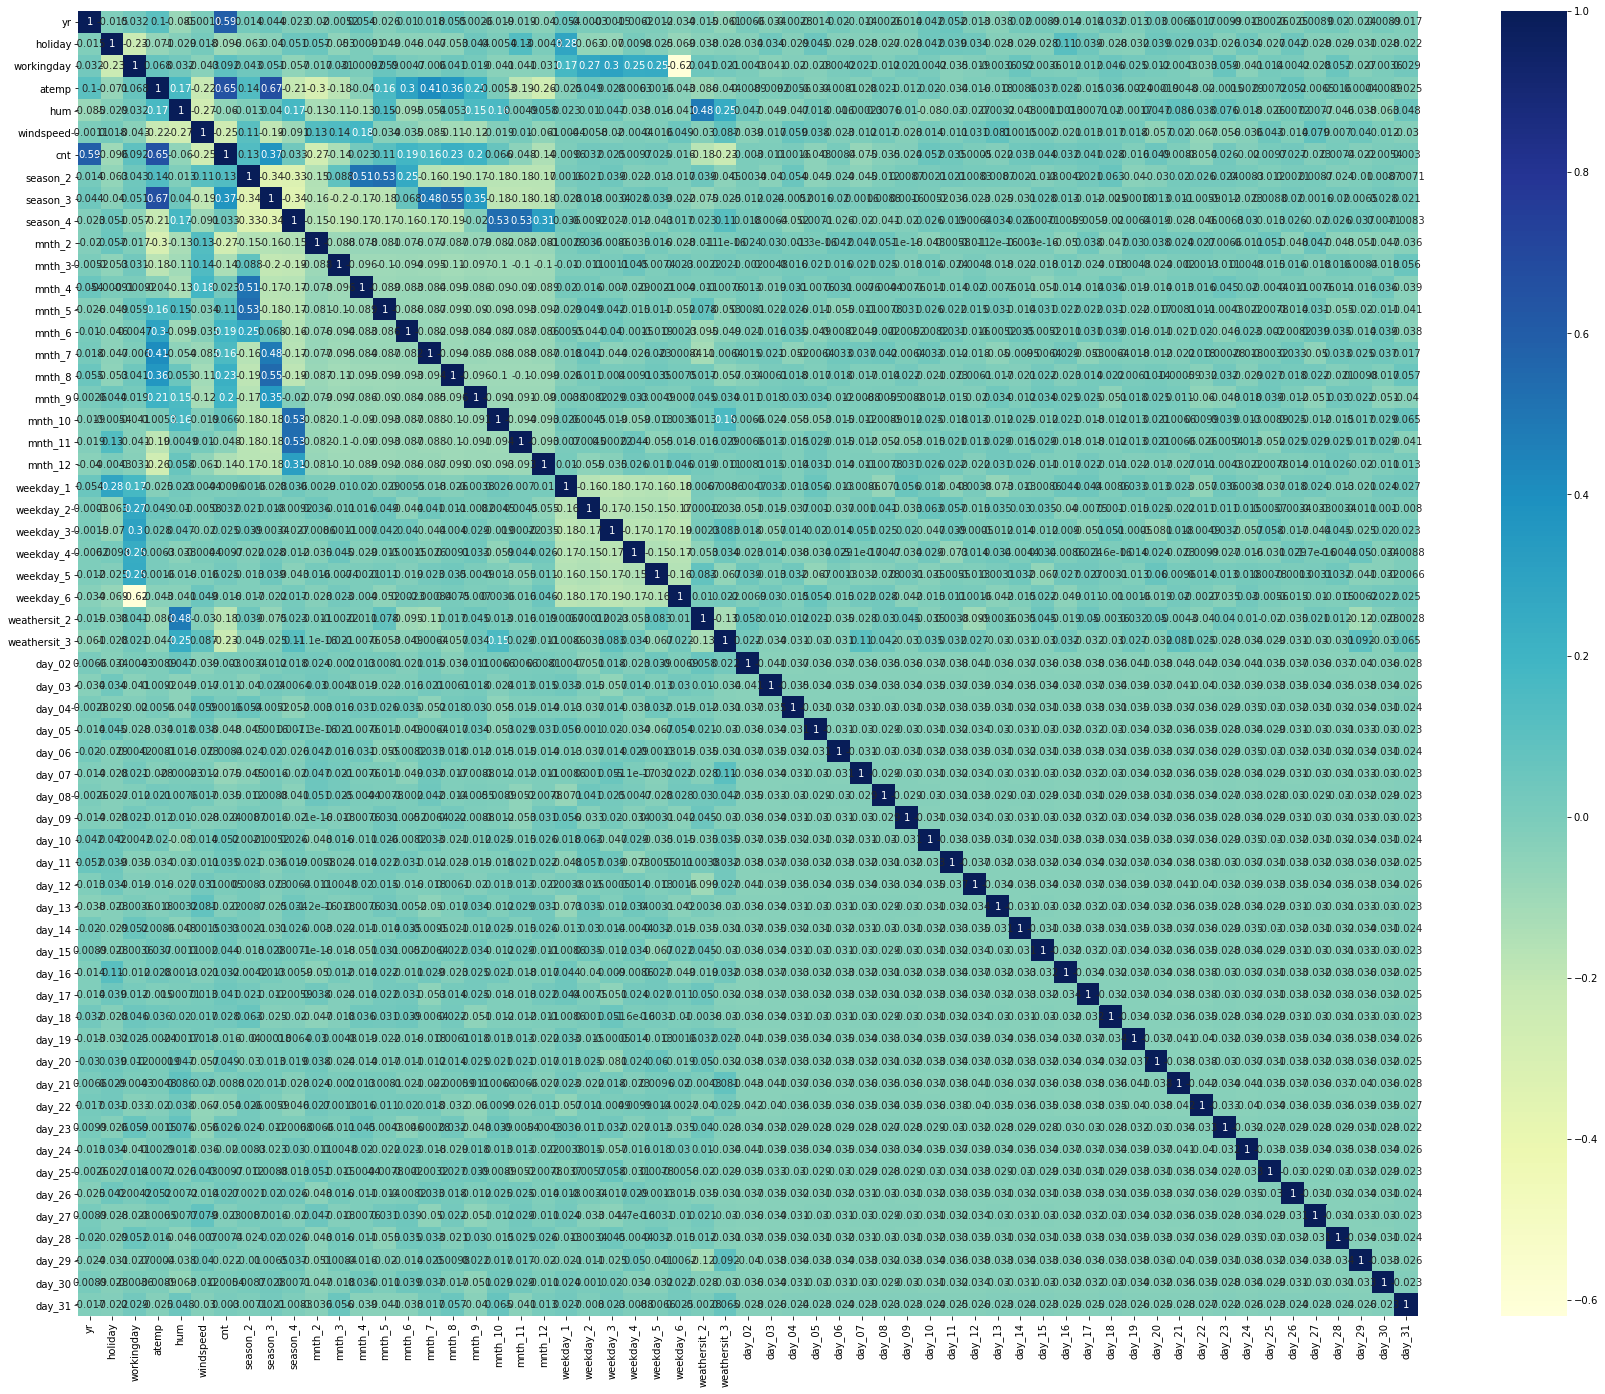

In [27]:
plt.figure(figsize=(30,24))
sns.heatmap(sharing_df_train.corr(),annot=True,cmap='YlGnBu')

In [28]:
### As we can see from here that `cnt` is highly corelated with `atemp`

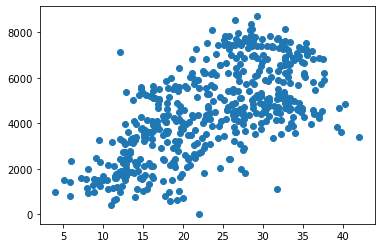

In [29]:
plt.scatter(sharing_df_train.atemp,sharing_df_train.cnt)

### Rescaling train data using Min-max Scaling

In [30]:
#Instatiating scaler object
scaler= MinMaxScaler()

In [31]:
# Variables which will be scaled
num_vars=['atemp','hum','windspeed','cnt']

# fitting and tranforming training data
sharing_df_train[num_vars]= scaler.fit_transform(sharing_df_train[num_vars])
sharing_df_train.describe()

<ipython-input-31-1ffca9790040>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharing_df_train[num_vars]= scaler.fit_transform(sharing_df_train[num_vars])
/Users/290020828/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


yr     holiday  workingday       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.512989    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.332086    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.526811    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt    season_2    season_3   season_4      mnth_2      mnth_3  \
count  510.000000  510.000000  510.000000  510.00000  510.000000  510.000000   
mean     0.513620    0.245098    0.262745    0.24902    0.066667    0.098039   
std      0.224593    0.430568    0.440557    0.43287    0.249689    0.297660   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.356420    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.518638    0.000000    0.000000    0.00000    0.000000    0.000000   
75%      0.684710    0.000000    1.000000    0.00000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

           mnth_4      mnth_5      mnth_6      mnth_7      mnth_8      mnth_9  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.078431    0.084314    0.074510    0.076471    0.096078    0.080392   
std      0.269113    0.278131    0.262857    0.266010    0.294988    0.272166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          mnth_10     mnth_11     mnth_12   weekday_1   weekday_2   weekday_3  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.086275    0.084314    0.150980    0.131373    0.158824   
std      0.281045    0.281045    0.278131    0.358381    0.338139    0.365870   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_4   weekday_5   weekday_6  weathersit_2  weathersit_3  \
count  510.000000  510.000000  510.000000    510.000000    510.000000   
mean     0.133333    0.127451    0.154902      0.343137      0.029412   
std      0.340268    0.333805    0.362166      0.475223      0.169124   
min      0.000000    0.000000    0.000000      0.000000      0.000000   
25%      0.000000    0.000000    0.000000      0.000000      0.000000   
50%      0.000000    0.000000    0.000000      0.000000      0.000000   
75%      0.000000    0.000000    0.000000      1.000000      0.000000   
max      1.000000    1.000000    1.000000      1.000000      1.000000   

           day_02      day_03      day_04      day_05      day_06      day_07  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.041176    0.037255    0.031373    0.029412    0.031373    0.029412   
std      0.198893    0.189572    0.174494    0.169124    0.174494    0.169124   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000

### As we can see that all the columns have max value as 1, hence our data is scaled and ready for modelling

#### Splitting data to X_train and y_train

In [32]:
y_train=sharing_df_train.pop('cnt')
X_train=sharing_df_train

print(X_train.shape)
print(y_train.shape)

(510, 58)
(510,)


## Step 4- Building Model

We will be using `RFE(Recursive Feature Elimination)` technique to predict the variables.

In [33]:
# Running RFE for 10 output variables

#instantiating object
lm= LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [34]:
#Running RFE
rfe= RFE(lm,10)

rfe=rfe.fit(X_train,y_train)

/Users/290020828/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 5),
 ('season_4', True, 1),
 ('mnth_2', False, 26),
 ('mnth_3', False, 10),
 ('mnth_4', False, 17),
 ('mnth_5', False, 9),
 ('mnth_6', False, 11),
 ('mnth_7', False, 25),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', False, 6),
 ('mnth_11', False, 43),
 ('mnth_12', False, 44),
 ('weekday_1', False, 14),
 ('weekday_2', False, 15),
 ('weekday_3', False, 13),
 ('weekday_4', False, 16),
 ('weekday_5', False, 12),
 ('weekday_6', False, 7),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1),
 ('day_02', False, 30),
 ('day_03', False, 29),
 ('day_04', False, 36),
 ('day_05', False, 39),
 ('day_06', False, 34),
 ('day_07', False, 49),
 ('day_08', False, 42),
 ('day_09', False, 38),
 ('day_10', False, 24),
 ('day_11', False, 20),
 ('day_12', False, 27),
 ('day_13', False, 32),
 ('day_14', False, 33),
 (

In [36]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weathersit_3', 'day_31'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2', 'day_02', 'day_03', 'day_04', 'day_05',
       'day_06', 'day_07', 'day_08', 'day_09', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30'],
      dtype='object')

### Building model using statsModel for details statistics

In [38]:
X_train_rfe= X_train[col]

In [39]:
X_train_rfe.sample(5)

yr  holiday     atemp       hum  windspeed  season_2  season_4  mnth_9  \
419   1        0  0.435665  0.759983   0.419777         0         0       0   
271   0        0  0.650335  0.720481   0.280719         0         1       1   
141   0        0  0.650319  0.772434   0.227242         1         0       0   
319   0        0  0.489506  0.958351   0.203210         0         1       0   
651   1        0  0.563297  0.659940   0.508015         0         1       0   

     weathersit_3  day_31  
419             0       0  
271             0       0  
141             0       0  
319             1       0  
651             0       0

In [40]:
#Adding Constant for statsmodel

X_train_rfe= sm.add_constant(X_train_rfe)

# Running linear model 
lm= sm.OLS(y_train,X_train_rfe).fit() 

In [41]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     235.2
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          1.10e-181
Time:                        21:12:13   Log-Likelihood:                 482.94
No. Observations:                 510   AIC:                            -943.9
Df Residuals:                     499   BIC:                            -897.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2643      0.027      9.890   

In [42]:
# Calculating VIF for all the dataset
X=X_train_rfe.drop(['const'],axis=1)

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
3           hum  10.34
2         atemp   7.30
4     windspeed   3.53
0            yr   2.01
6      season_4   1.63
5      season_2   1.58
7        mnth_9   1.21
8  weathersit_3   1.09
1       holiday   1.04
9        day_31   1.03

### Observation - in first model 

- We can see that R-squared is 82% 
- Prob (F-statistic) is below the required values
- P Value of each variable is less than 0.05
- VIF shows hum at 10.34 means highly dependent on other variables

In [43]:
# Removing hum and recreating model
X_train_rfe= X_train[col]
X_train_new= X_train_rfe.drop(['hum'],axis=1)

#Adding constant
X_train_lm= sm.add_constant(X_train_new)

#Running model
lm=sm.OLS(y_train,X_train_lm).fit()

#Checking summary
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     218.7
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          4.55e-167
Time:                        21:12:13   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -871.2
Df Residuals:                     500   BIC:                            -828.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0799      0.018      4.428   

In [44]:
# Calculating VIF for all the dataset
X=X_train_lm.drop(['const'],axis=1)

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
2         atemp  3.65
3     windspeed  2.93
0            yr  2.00
4      season_2  1.56
5      season_4  1.36
6        mnth_9  1.20
7  weathersit_3  1.07
1       holiday  1.03
8        day_31  1.02

### Observation- 

- We can see from here that VIF is below 5 for all variables
- P value is well in limits for all the values
- R-squared is at 79%

## Residual Analysis of the train data

In [45]:
#Checking if error term is normally distributed
y_train_price=lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

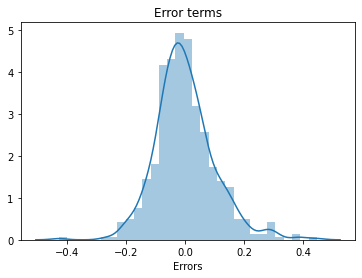

In [46]:
sns.distplot(y_train_price-y_train)
plt.title("Error terms")
plt.xlabel("Errors")

## Making Predictions

### Applying scaling on test data set

In [47]:
sharing_df_test[num_vars]= scaler.transform(sharing_df_test[num_vars])

<ipython-input-47-9e0e1bcf652e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharing_df_test[num_vars]= scaler.transform(sharing_df_test[num_vars])
/Users/290020828/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Diving into X_test and y_test

In [48]:
y_test= sharing_df_test.pop('cnt')
X_test=sharing_df_test

In [49]:
X_test_new= X_test[X.columns]
X_test_new

yr  holiday     atemp  windspeed  season_2  season_4  mnth_9  \
184   0        1  0.769660   0.084219         0         0       0   
535   1        0  0.842587   0.153728         1         0       0   
299   0        0  0.496145   0.334206         0         1       0   
221   0        0  0.795343   0.339570         0         0       0   
152   0        0  0.741471   0.537414         1         0       0   
404   1        0  0.240105   0.326196         0         0       0   
198   0        0  0.820207   0.372990         0         0       0   
171   0        0  0.733207   0.276724         0         0       0   
512   1        1  0.787883   0.331536         1         0       0   
200   0        0  0.876552   0.153738         0         0       0   
509   1        0  0.719927   0.211209         1         0       0   
559   1        0  0.770481   0.217936         0         0       0   
109   0        0  0.637051   0.429145         1         0       0   
467   1        0  0.463017   0.243286         1         0       0   
339   0        0  0.495297   0.409062         0         1       0   
589   1        0  0.765508   0.201883         0         0       0   
222   0        0  0.751420   0.263333         0         0       0   
40    0        0  0.092512   0.386171         0         0       0   
682   1        0  0.265800   0.338209         0         1       0   
453   1        0  0.389264   0.205871         1         0       0   
606   1        0  0.753071   0.074840         0         0       0   
265   0        0  0.581570   0.077527         0         1       1   
510   1        0  0.739836   0.336848         1         0       0   
19    0        0  0.230998   0.330209         0         0       0   
117   0        0  0.656133   0.598943         1         0       0   
423   1        0  0.360260   0.324863         0         0       0   
614   1        0  0.758879   0.278059         0         0       1   
163   0        0  0.685963   0.565497         1         0       0   
630   1        0  0.577380   0.389015         0         1       1   
191   0        0  0.854177   0.516023         0         0       0   
572   1        0  0.859969   0.237957         0         0       0   
662   1        0  0.591497   0.176436         0         1       0   
264   0        0  0.624674   0.184498         0         0       1   
625   1        0  0.637937   0.677796         0         0       1   
325   0        0  0.449743   0.164434         0         1       0   
114   0        0  0.650319   0.307484         1         0       0   
218   0        0  0.835128   0.342212         0         0       0   
678   1        0  0.413306   0.033411         0         1       0   
24    0        0  0.204058   0.188090         0         0       0   
432   1        0  0.417436   0.800793         0         0       0   
395   1        0  0.396741   0.471909         0         0       0   
48    0        0  0.568257   0.478591         0         0       0   
684   1        0  0.351963   0.276724         0         1       0   
203   0        0  0.951946   0.191154         0         0       0   
450   1        0  0.310549   0.311480         1         0       0   
538   1        0  0.753088   0.295419         0         0       0   
73    0        0  0.313862   0.305282         0         0       0   
269   0        0  0.650352   0.163099         0         1       1   
710   1        0  0.286507   0.259337         0         1       0   
98    0        0  0.344513   0.195157         1         0       0   
530   1        0  0.683469   0.288746         1         0       0   
173   0        0  0.806960   0.422436         0         0       0   
418   1        0  0.479606   0.319480         0         0       0   
503   1        0  0.640354   0.089584         1         0       0   
727   1        0  0.214393   0.176453         0         0       0   
550   1        0  0.895607   0.326179         0         0       0   
714   1        0  0.381804   0.125630         0         1       0   
448

In [50]:
# Adding constant 
X_test_lm= sm.add_constant(X_test_new)

#Making prediction
y_pred= lm.predict(X_test_lm)
y_pred

184    0.447322
535    0.874837
299    0.454642
221    0.514079
152    0.531600
404    0.418174
198    0.524820
171    0.484668
512    0.736887
200    0.585806
509    0.794226
559    0.749304
109    0.482506
467    0.636359
339    0.193233
589    0.748319
222    0.497241
40     0.087313
682    0.551180
453    0.596831
606    0.756652
265    0.629326
510    0.790543
19     0.177214
117    0.472841
423    0.490309
614    0.826515
163    0.494864
630    0.823127
191    0.527398
572    0.800418
662    0.766361
264    0.522747
625    0.704416
325    0.196337
114    0.505567
218    0.537581
678    0.677397
24     0.178732
432    0.465432
395    0.564480
48     0.360790
684    0.610428
203    0.626317
450    0.536563
538    0.729260
73     0.229944
269    0.659894
710    0.573381
98     0.336351
530    0.762756
173    0.510743
418    0.562463
503    0.761673
727    0.421375
550    0.810805
714    0.647072
448    0.623384
248    0.182244
685    0.591733
410    0.491974
201    0.619431
41     0

### Model Evaluation

Text(0.5, 1.0, 'y_test vs y_pred')

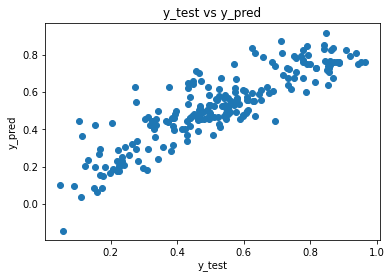

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("y_test vs y_pred")

### R squared

In [52]:
r2_score(y_test,y_pred)

0.7672093047165445

### We can see here that R-squared value for test and train are within the range.

## Result

#### We can see that the equation of best fitted line is -


since, 
- `season_2` means `season2`
- `season_4` means `season4`
- `mnth_9` means `november`
- `weathersit_3` means `weathersit3`
- `day_31` means `lastDayOfMonth'

Hence, replacing variables becomes - 

 $ cnt = 0.2350 \times yr + 0.599 \times atemp - 0.0831 \times holiday - 0.1242 \times windspeed + 0.0744 \times season2 + 0.1191 \times season4 + 0.0916 \times november - 0.2516 \times weathersit3 + 0.0706 \times lastDayOfMonth +0.0799 $

    